<a href="https://colab.research.google.com/github/GRomeroNaranjo/GRomeroNaranjo/blob/main/Diabetes_Detector_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diabetes Prediction Model Using Machine Learning**

Welcome to this notebook, this project aims to develop a easy to use Machine Learning library that determines if you have diabetes or not. Diabetes is a cronich health condition affecting millions of people, and using the famous Pima Indians Diabetes dataset we can effectivly execute this project. This project is relevant due to the fact of how diabetes affects people, how it impacts people but more importantly how knowing if you have it is crucial in determining the next steps to take.

## **Introduction**

Diabetes is a metabolic disorder characterized by high blood sugar levels over a prolonged period. Early diagnosis and intervention are critical to prevent complications such as cardiovascular diseases, kidney failure, and blindness. Machine learning, particularly classification algorithms, can aid in predicting diabetes risk based on patient health data.

## **Objective**

The objective of this project is to develop a predictive model that can accurately classify whether a person is likely to have diabetes based on several health indicators. We will utilize logistic regression, a widely-used classification algorithm, to train our model. Logistic regression is suitable for binary classification tasks, making it ideal for predicting diabetes outcomes (0 for non-diabetic, 1 for diabetic) based on input features.

## **Dataset**

We will use the Pima Indians Diabetes Database, which is a well-known dataset used by researchers and practitioners in the field of machine learning. It consists of various health metrics such as glucose levels, blood pressure, BMI, and others, along with a binary outcome indicating the presence or absence of diabetes.

## **Methodology**

1. **Data Loading and Preprocessing**: We will start by loading the dataset and performing basic preprocessing steps such as handling missing values and scaling numeric features using `StandardScaler`.

2. **Model Training**: We will train a logistic regression model using the preprocessed data. Logistic regression fits a logistic curve to the data and makes predictions based on the probability of an instance belonging to a particular class.

3. **Model Evaluation**: We will evaluate the performance of our model using relevant metrics such as accuracy, precision, recall, and F1-score. These metrics will help us assess how well our model predicts diabetes outcomes.

4. **Prediction**: Once trained and evaluated, we will demonstrate how to use our trained model to make predictions on new, unseen data. This will enable healthcare providers and individuals to assess diabetes risk based on input health metrics.

# **Implementation**

In [25]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

def load_dataset():
    data = pd.read_csv('diabetes.csv')
    return data

class DiabetesCalculator:
    def __init__(self):
        db = load_dataset()
        self.X = db.drop('Outcome', axis=1)
        self.y = db['Outcome']
        self.scaler = StandardScaler()
        self.model = LogisticRegression()
        self.X_scaled = self.scaler.fit_transform(self.X)
    def predict(self, pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, diabetes_pedigree_function, age):
      self.model.fit(self.X_scaled, self.y)
      predictions = self.model.predict([ [pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, diabetes_pedigree_function, age] ])
      return predictions



calculator = DiabetesCalculator()
predictions = calculator.predict(2, 100, 70, 20, 80, 25.0, 0.5, 33)
print(predictions)

[1]


# **Testing the Accuracy**

During this section we will be testing the accuracy of our model, this will allow us to get a sense of how helpful the model can be and what limitations it can create.

## **Importing the neccessary libraries, and visualising the data**

In [26]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

db = pd.read_csv('diabetes.csv')

db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## **Describing the Data**

In [27]:
db.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## **Visualising our Outcome with graphs**

<Axes: xlabel='Outcome'>

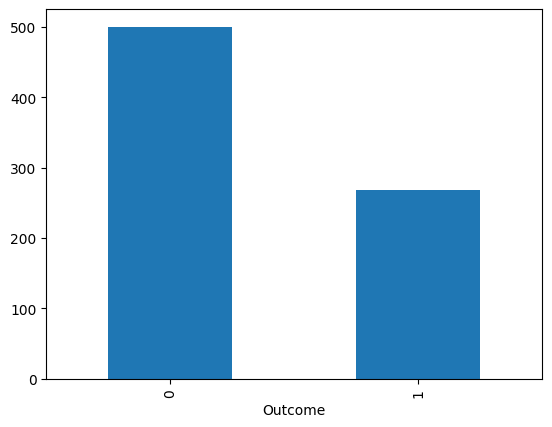

In [29]:
db['Outcome'].value_counts().plot(kind='bar')

## **Splitting our Data into X and y**

In [30]:
X = db.drop('Outcome', axis=1)
y= db['Outcome']

## **Scaling our X**

In [33]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

## **Dividing our data into Train Test Split**

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [35]:
X_train

array([[-0.84488505, -0.81042491, -0.47073225, ..., -1.02710391,
        -0.63989158, -0.95646168],
       [ 0.3429808 , -0.49745345,  0.14964075, ...,  0.62284628,
        -0.94492356, -0.44593516],
       [-1.14185152,  0.44146091, -0.05715025, ...,  1.30821021,
        -0.32277912, -0.78628618],
       ...,
       [ 1.82781311, -0.62264204,  0.87340925, ...,  1.72704372,
         2.00573238,  0.40494237],
       [-1.14185152,  0.62924378, -3.57259724, ...,  1.32090213,
        -0.8059981 , -0.36084741],
       [-1.14185152,  0.12848945,  1.39038675, ..., -1.20479085,
        -0.63385134, -1.04154944]])

In [36]:
X_test

array([[ 0.63994726, -0.71653347, -0.57412775, ...,  0.25478047,
        -0.1264714 ,  0.83038113],
       [-0.54791859, -0.27837344,  0.304734  , ...,  0.47054319,
        -0.97814487, -1.04154944],
       [-0.54791859, -0.40356202, -0.26394125, ..., -0.15136112,
        -0.94794368, -1.04154944],
       ...,
       [-1.14185152,  0.19108374,  0.56322275, ...,  0.54669473,
         1.00305298, -0.87137393],
       [ 0.63994726, -0.49745345,  0.04624525, ..., -0.15136112,
        -1.05666795,  0.31985461],
       [ 0.3429808 , -1.37377352,  0.66661825, ...,  0.48323511,
        -0.95398392,  0.14967911]])

In [37]:
y_train

334    0
139    0
485    1
547    0
18     0
      ..
71     0
106    0
270    1
435    1
102    0
Name: Outcome, Length: 537, dtype: int64

In [38]:
y_test

668    0
324    0
624    0
690    0
473    0
      ..
619    1
198    1
538    0
329    0
302    0
Name: Outcome, Length: 231, dtype: int64

## **Making a Prediction**

In [40]:
model = LogisticRegression()

model.fit(X_train, y_train)
predictions = model.predict(X_test)
predictions

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [42]:
accuracy = accuracy_score(predictions, y_test)

print(f'Accuracy Score: {accuracy}')

Accuracy Score: 0.7359307359307359


# **Conclusion**

After running our model through train and test variables we have come to the conclusion of a 0.74 accuracy of our model. And while this is very solid and good the more data we feed in the more accuracy the model will get.